## Large Graph Testing GA

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))
from src.utils import loading_graphs, plot_colored_graph
from src.optimizer import find_optimal_coloring

In [ ]:
path = "../data/le450_5a.col" 
graph = loading_graphs(path, )

# Como ya hicimos un "fine tuning" en el medium, le metemos las pruebas del principio y otras con mayor mutacion
configurations = [
    {"id": 1, "pop": 500, "mut": 0.05, "elite": 10, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"},
    {"id": 2, "pop": 500, "mut": 0.05, "elite": 10, "sel": "roulette",   "cross": "uniform",   "mut_type": "smart"},
    {"id": 3, "pop": 500, "mut": 0.05, "elite": 10, "sel": "tournament", "cross": "one_point", "mut_type": "smart"},
    {"id": 4, "pop": 500, "mut": 0.10, "elite": 10, "sel": "tournament", "cross": "uniform",   "mut_type": "random"},
    {"id": 5, "pop": 500, "mut": 0.30, "elite": 10, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"},
    {"id": 6, "pop": 500, "mut": 0.05, "elite": 10, "sel": "roulette",   "cross": "one_point", "mut_type": "smart"},

    {"id": 20, "pop": 100, "mut": 0.8, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # mut a 0.8
    {"id": 21, "pop": 100, "mut": 0.9, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # mut a 0.9
    {"id": 22, "pop": 100, "mut": 1, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # mut a 1
    {"id": 23, "pop": 100, "mut": 0.7, "elite": 2, "sel": "tournament", "cross": "one_point",   "mut_type": "smart"},
]

results = []
best_solution_overall = None
min_k_global = float('inf')

Graph Loaded
Nodes: 450
Edges: 5714


In [3]:
for config in configurations:
    start_time = time.time()
    
    genes, k_found, history = find_optimal_coloring(
        graph,
        start_colors=20,
        optimal_solution=5,
        pop_size=config["pop"],
        mutation_rate=config["mut"],
        elitism_count=config["elite"],
        selection=config["sel"],
        crossover=config["cross"],
        mutation=config["mut_type"],
        max_generations=3000
    )
    
    elapsed = time.time() - start_time
    
    print(f"Config {config['id']}: k={k_found} (Tiempo: {elapsed:.2f}s)")
    
    results.append({
        "ID": config["id"],
        "Colors": k_found,
        "Time": round(elapsed, 2),
        "Selection": config["sel"],
        "Crossover": config["cross"],
        "MutType": config["mut_type"]
    })
    
    if k_found is not None and k_found < min_k_global:
        min_k_global = k_found
        best_overall_history = history
        best_solution_overall = genes



 Solución válida encontrada para k=20. (Colores utilizados: 20)
 No se pudo encontrar solución válida para k=19 (Fitness: 23571).
 No se pudo encontrar solución válida para k=18 (Fitness: 57362).
 Solucion final con 20 colores
Config 20: k=20 (Tiempo: 257.35s)
 Solución válida encontrada para k=20. (Colores utilizados: 20)
 No se pudo encontrar solución válida para k=19 (Fitness: 17427).
 No se pudo encontrar solución válida para k=18 (Fitness: 72722).
 Solucion final con 20 colores
Config 21: k=20 (Tiempo: 321.11s)
 Solución válida encontrada para k=20. (Colores utilizados: 20)


KeyboardInterrupt: 

,ID,Colors,Time,Selection,Crossover,MutType
0,1,19.0,159.26,tournament,uniform,smart
1,2,20.0,135.41,roulette,uniform,smart
2,3,18.0,138.12,tournament,one_point,smart
3,4,NaN,27.16,tournament,uniform,random
4,5,19.0,149.66,tournament,uniform,smart
5,6,19.0,152.38,roulette,one_point,smart


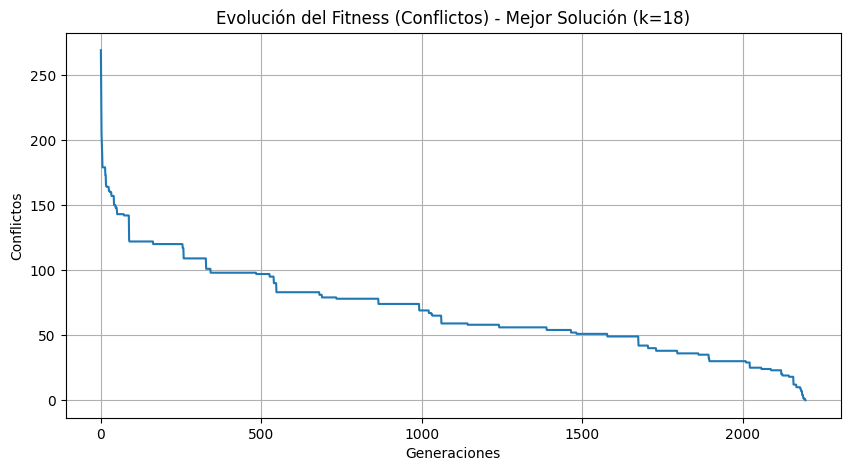

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results)
display(df)

if best_overall_history:
    plt.figure(figsize=(10, 5))
    plt.plot(best_overall_history)
    plt.title(f"Evolución del Fitness (Conflictos) - Mejor Solución (k={min_k_global})")
    plt.xlabel("Generaciones")
    plt.ylabel("Conflictos")
    plt.grid(True)
    plt.show()

/Users/toni/Documents/MESIIA/NEC/Activity2/src/utils.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


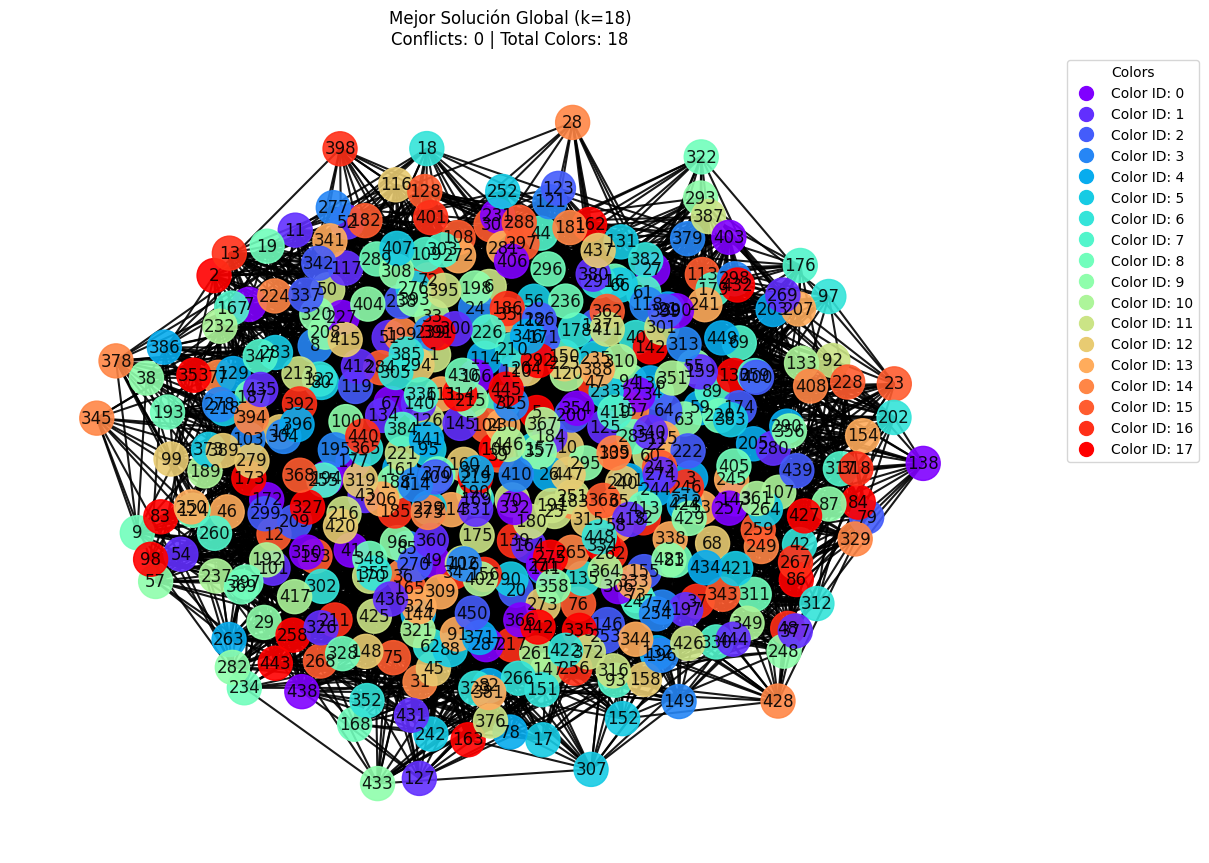

In [ ]:
if best_solution_overall is not None:
    class ResultObj:
        def __init__(self, genes, conflicts): 
            self.genes = genes
            self.conflicts = conflicts 
    
    final_solution_obj = ResultObj(best_solution_overall, 0)
    
    plot_colored_graph(
        graph, 
        final_solution_obj, 
        title=f"Mejor Solución Global (k={min_k_global})"
    )
else:
    print("No se encontró ninguna solución válida en los experimentos.")